In [1]:
import pandas, warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
air = "airline.csv"

airline = pandas.read_table(air, sep=",", parse_dates=["Month"])

airline.columns = ["Month", "Monthly Passengers"]

airline = airline.set_index("Month").sort_index()

airline.iloc[:5]

,Monthly Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.tail()

,Monthly Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
airline.index.min()

Timestamp('1949-01-01 00:00:00')

In [5]:
airline.index.max()

Timestamp('1960-12-01 00:00:00')

In [6]:
null = airline.isnull().sum()

null.sum()

np.int64(0)

In [7]:
total = airline.shape[0]

total

144

🚀 Ch.01 Result

Our Airline Table is From January 1949 to December 1960

Our Airline Table is Clear of Missing Value

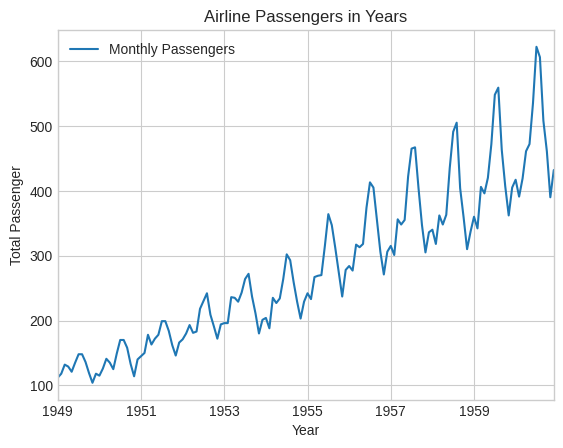

In [8]:
title = "Airline Passengers in Years"

xlabel = "Year"

ylabel = "Total Passenger"

airline.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [9]:
sample = airline["1949-01-01":"1950-12-31"]

sample.iloc[:5]

,Monthly Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


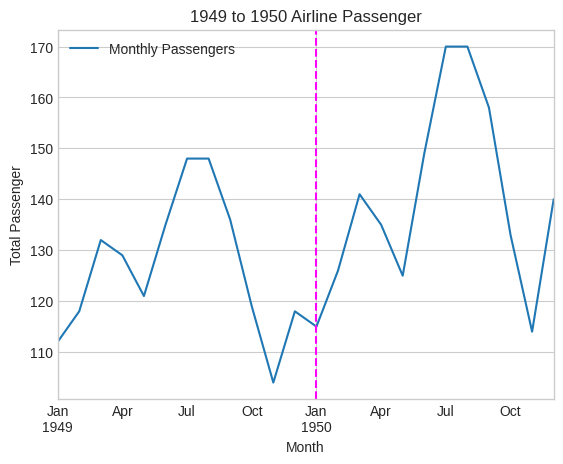

In [10]:
title = "1949 to 1950 Airline Passenger"

xlabel = "Month"

ylabel = "Total Passenger"

axes = sample.plot.line(title=title, xlabel=xlabel, ylabel=ylabel)

axes.axvline("1950-01-01", color="magenta", linestyle="--");

On 1949 and 1950, There are *Seasonality* on Yearly Basis

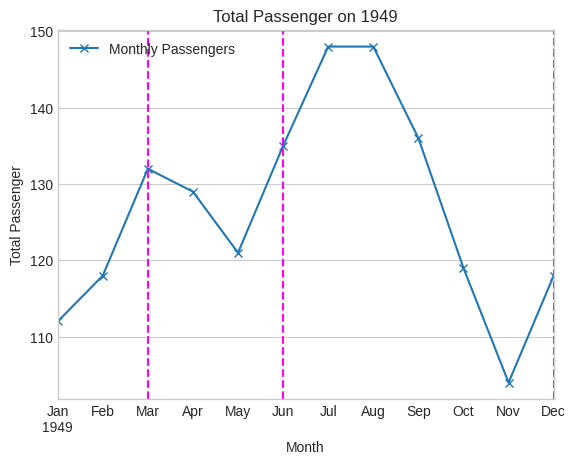

In [11]:
title = "Total Passenger on 1949"

xlabel = "Month"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1949-12-01"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

for lab in ["1949-03", "1949-06", "1949-12"]:

  axes.axvline(lab, color="magenta", linestyle="--")

Our Total Monthly Passengers *Increased on March, June, and December* and *Decreased on May and September*

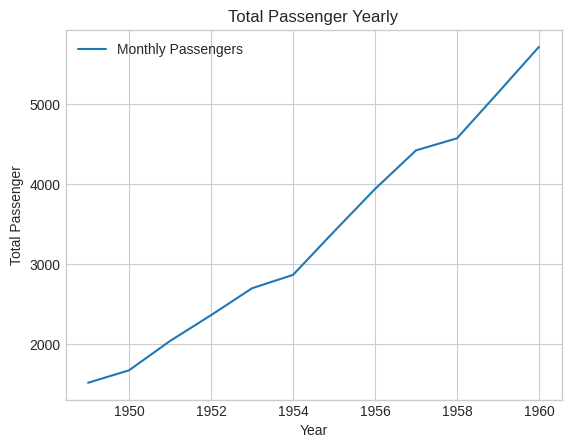

In [12]:
total = airline.groupby(airline.index.year).sum()

title = "Total Passenger Yearly"

xlabel = "Year"

ylabel = "Total Passenger"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

🚀 Ch.02 Plot Result

Our Airline Table is in January 1949 to December 1960

Over the Years, Our Monthly Total Passengers Trend is *Increasing* and also Having Consistent *Seasonality*

Main Reason on Our Monthly Total Passengers *Seasonality* is *Holiday*

On June to August, *in the Northern Hemisphere is Summer Holiday*. On December, is *Christmas and New Year Eve*

In [13]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

airline_report = seasonal_decompose(airline)

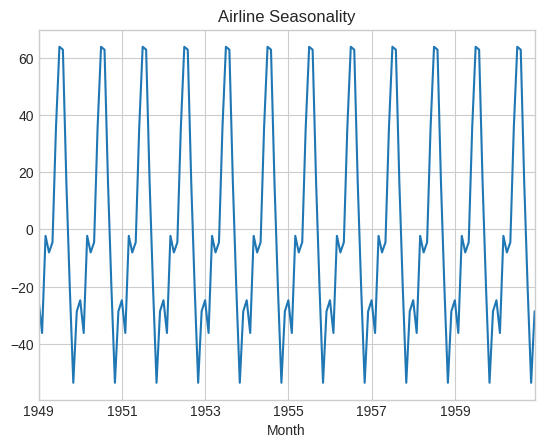

In [14]:
title  = "Airline Seasonality"

airline_report.seasonal.plot(title=title);

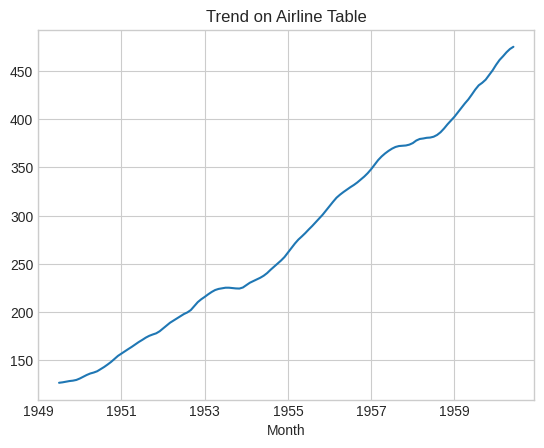

In [15]:
title  = "Trend on Airline Table"

airline_report.trend.plot(title=title);

`Original Airline ADF Test`

In [16]:
from statsmodels.tsa.stattools import adfuller

test_result, p_value, use_lag, obser, crival, criterion = adfuller(airline)

alpha = 0.05

is_stationar = test_result < alpha

is_stationar, test_result

(np.False_, np.float64(0.8153688792060498))

`First Order ADF Test`

In [17]:
sample_satu = airline.diff().dropna()

test_result, p_value, use_lag, obser, crival, criterion = adfuller(sample_satu)

is_stationar = test_result < alpha

is_stationar, test_result

(np.True_, np.float64(-2.8292668241700047))

Initially, Our Airline Table *isn't Stationary*. Our Airline *is Stationary at First Order Diff*

We'll Use Sample Satu Table to ACF & PACF Plot

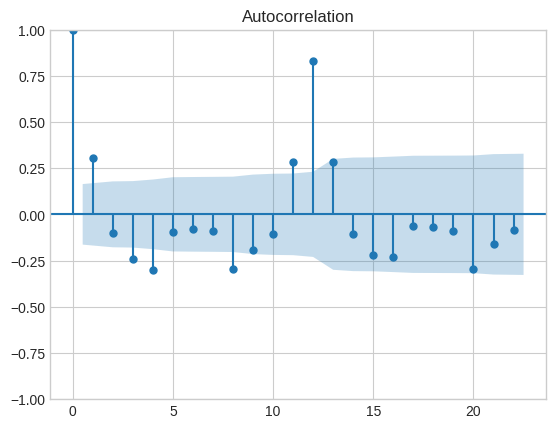

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sample_satu);

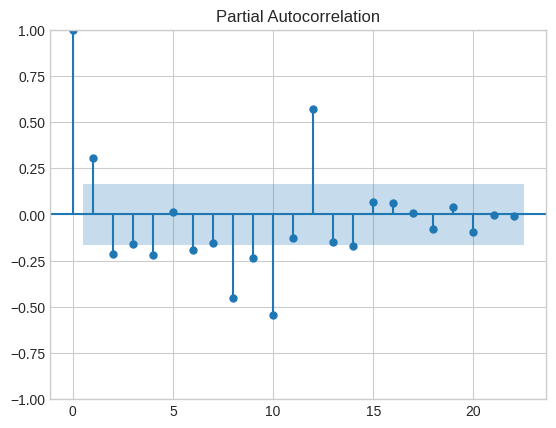

In [19]:
plot_pacf(sample_satu);

🚀 Ch.02 Plot Result

Due to *First Order Diff*, Our *d* Will be 1. Our *p* Will be 1 or 2. Our *q* Will be 1